Re-create the following figure using the `mpg` data set.

<img src="figs/example.png" style="width: 600px;" />

Hints:
- you can make a table with median values using `group_by` and `summarize`
- use `geom_crossbar` to create the vertical line for median values
- use `fct_reorder` to set the levels for `class`

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [18]:
mpg_cty_median = mpg |>
    group_by(class) |>
    summarize(cty = median(cty)) |>
    arrange(cty)

In [13]:
mpg |>
    mutate(class = fct_reorder(class, cty, median)) |>
    pull(class) |>
    levels()

[1] "pickup"     "suv"        "2seater"    "minivan"    "midsize"   
[6] "subcompact" "compact"

In [15]:
mpg2 = mpg |>
    mutate(class = fct_reorder(class, cty, median))

mpg2 |> head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<fct>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


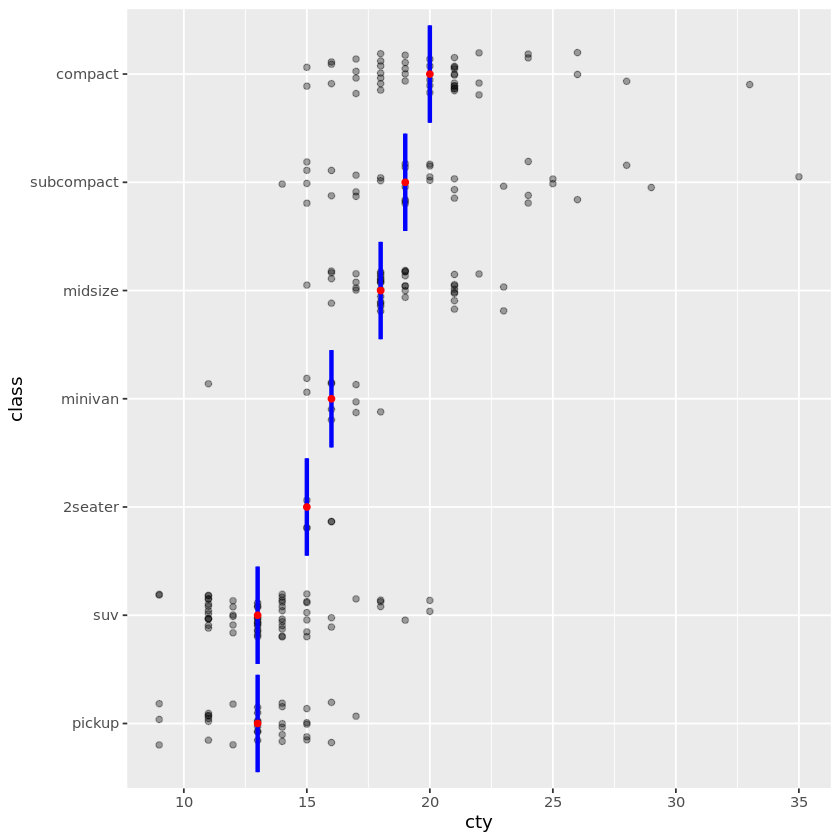

In [29]:
p = ggplot(mpg2, aes(x = cty, y = class)) +
    geom_point(alpha = 0.35, position = position_jitter(height=0.2, width = 0)) +
    geom_crossbar(data = mpg_cty_median, aes(xmax = cty, xmin = cty), color = 'blue') +
    geom_point(color = 'red', data = mpg_cty_median)

p